In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
import pickle
from scipy.stats import zscore
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

In [3]:
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


Quick Preview of Data

In [4]:
data.shape

(30, 17)

Dataset has 30 row's of data including 16 features and 1 label

# DATA PRE-PROCESSING

In [5]:
data.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

No Null Values present in the dataset

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.shape

(30, 17)

no duplicate values present in the Data

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
W,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
R,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
AB,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
H,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
2B,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
3B,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
HR,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
BB,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
SO,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
SB,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


all the features in data are continous

# EDA

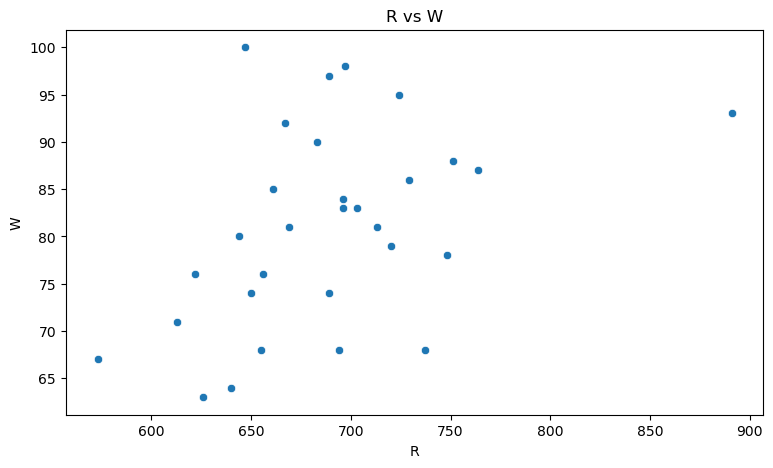

In [9]:
plt.figure(figsize=(9,5))

sns.scatterplot(x=data['R'],y=data['W'])

plt.title("R vs W")

plt.xlabel('R')

plt.ylabel("W")

plt.show()

R has positive  relation with W

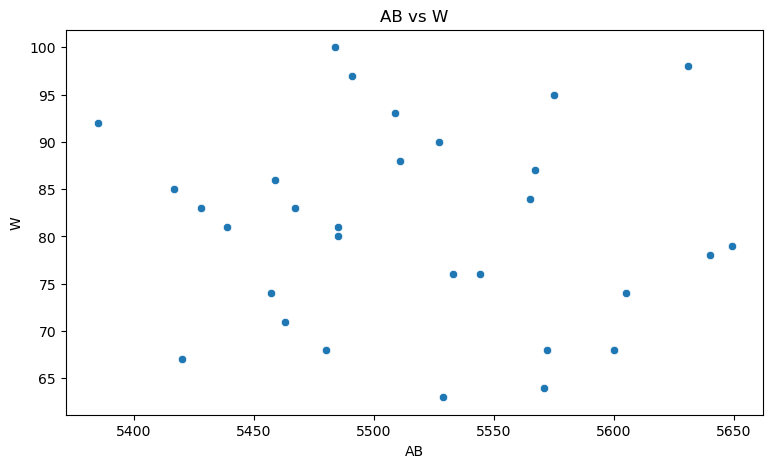

In [10]:
plt.figure(figsize=(9,5))

sns.scatterplot(x=data['AB'],y=data['W'])

plt.title("AB vs W")

plt.xlabel('AB')

plt.ylabel("W")

plt.show()

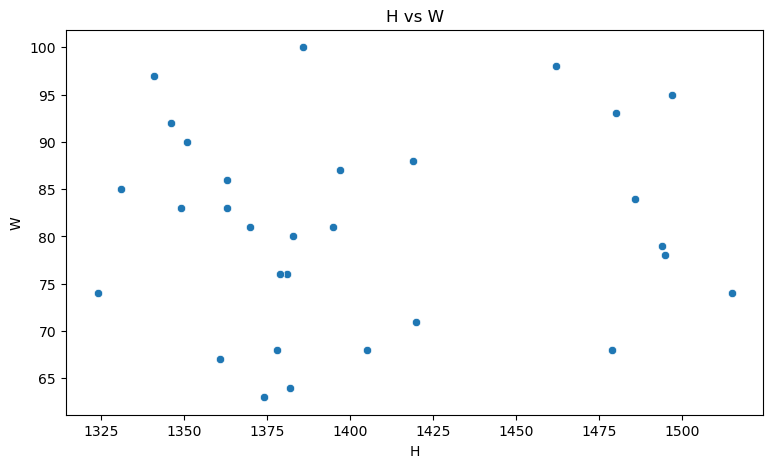

In [11]:
plt.figure(figsize=(9,5))

sns.scatterplot(x=data['H'],y=data['W'])

plt.title("H vs W")

plt.xlabel('H')

plt.ylabel("W")

plt.show()

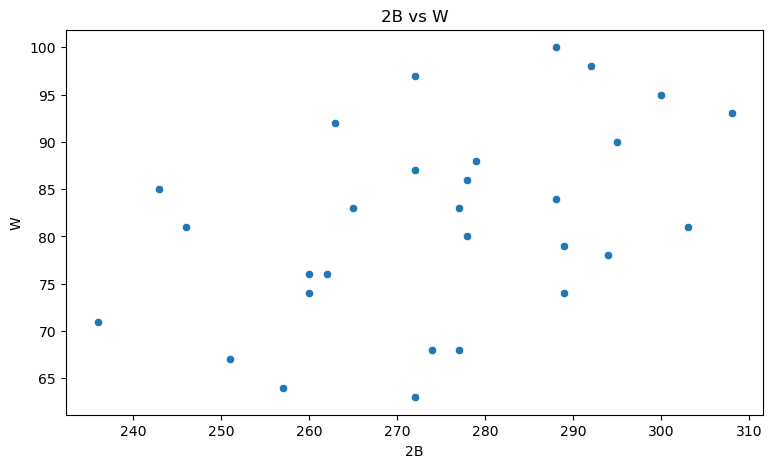

In [12]:
plt.figure(figsize=(9,5))

sns.scatterplot(x=data['2B'],y=data['W'])

plt.title("2B vs W")

plt.xlabel('2B')

plt.ylabel("W")

plt.show()

2B has positive relation with W

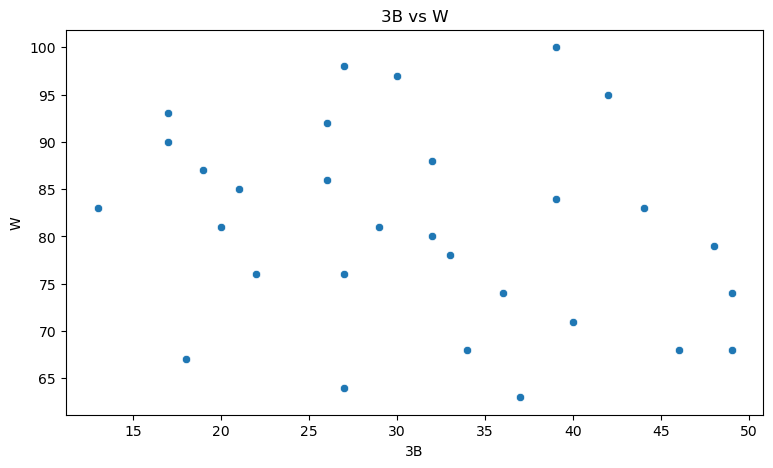

In [13]:
plt.figure(figsize=(9,5))

sns.scatterplot(x=data['3B'],y=data['W'])

plt.title("3B vs W")

plt.xlabel('3B')

plt.ylabel("W")

plt.show()

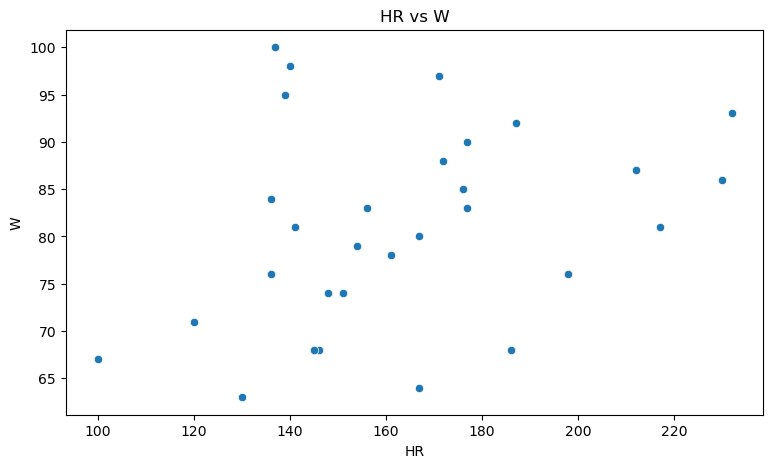

In [14]:
plt.figure(figsize=(9,5))

sns.scatterplot(x=data['HR'],y=data['W'])

plt.title("HR vs W")

plt.xlabel('HR')

plt.ylabel("W")

plt.show()

HR has positive relation with W

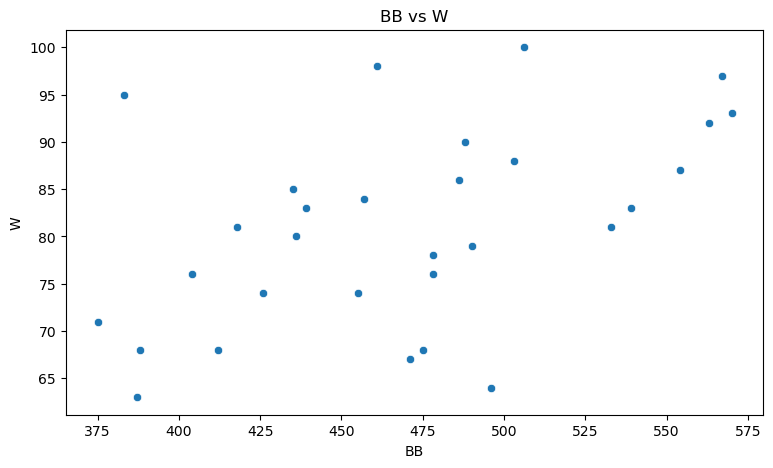

In [15]:
plt.figure(figsize=(9,5))

sns.scatterplot(x=data['BB'],y=data['W'])

plt.title("BB vs W")

plt.xlabel('BB')

plt.ylabel("W")

plt.show()

BB has positive relation with W

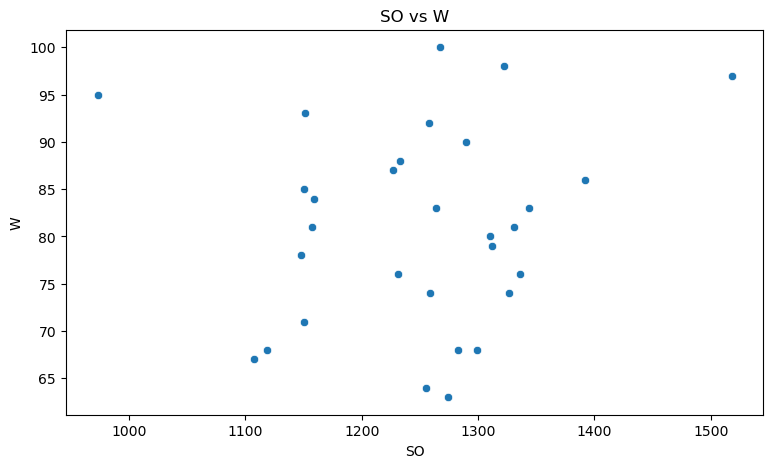

In [16]:
plt.figure(figsize=(9,5))

sns.scatterplot(x=data['SO'],y=data['W'])

plt.title("SO vs W")

plt.xlabel('SO')

plt.ylabel("W")

plt.show()

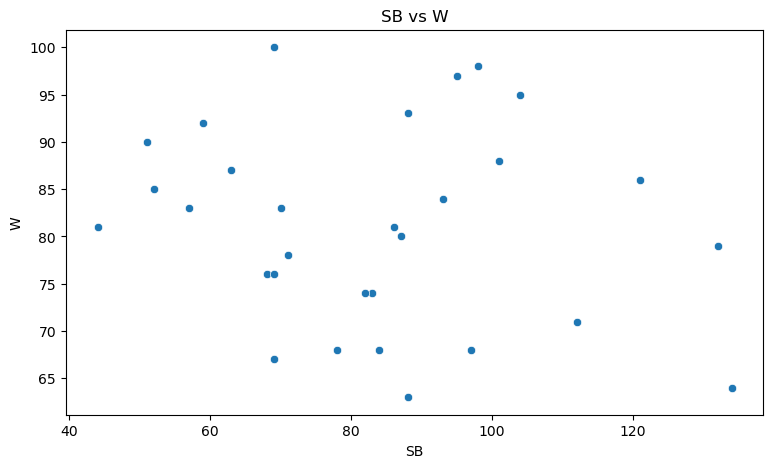

In [17]:
plt.figure(figsize=(9,5))

sns.scatterplot(x=data['SB'],y=data['W'])

plt.title("SB vs W")

plt.xlabel('SB')

plt.ylabel("W")

plt.show()

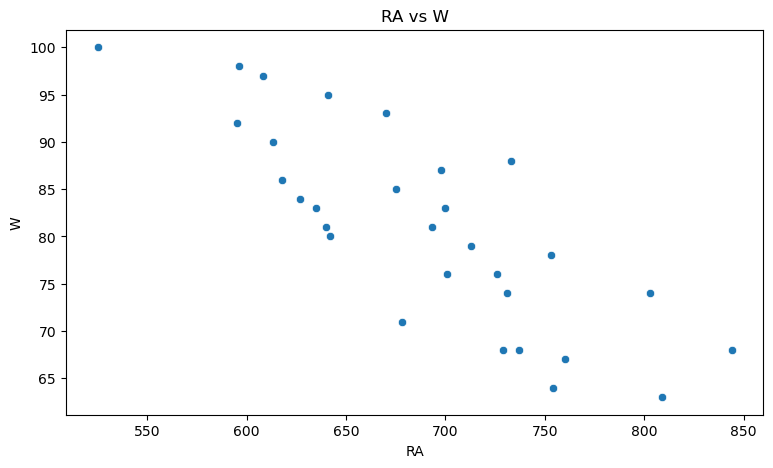

In [18]:
plt.figure(figsize=(9,5))

sns.scatterplot(x=data['RA'],y=data['W'])

plt.title("RA vs W")

plt.xlabel('RA')

plt.ylabel("W")

plt.show()

RA has negative relation with W

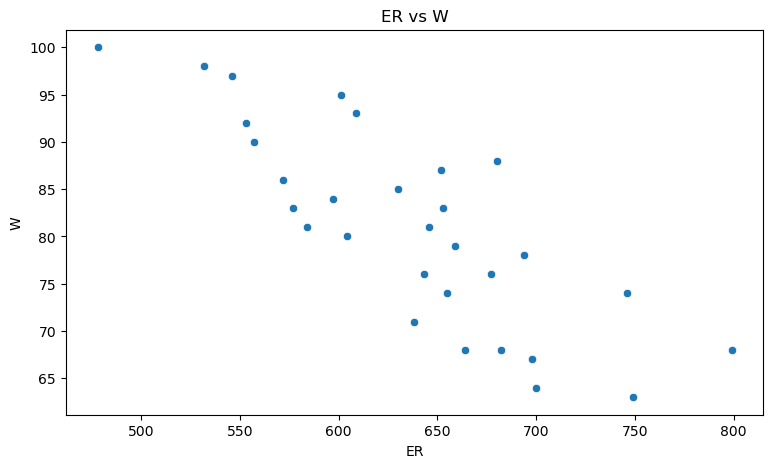

In [19]:
plt.figure(figsize=(9,5))

sns.scatterplot(x=data['ER'],y=data['W'])

plt.title("ER vs W")

plt.xlabel('ER')

plt.ylabel("W")

plt.show()

ER has negative relation with W

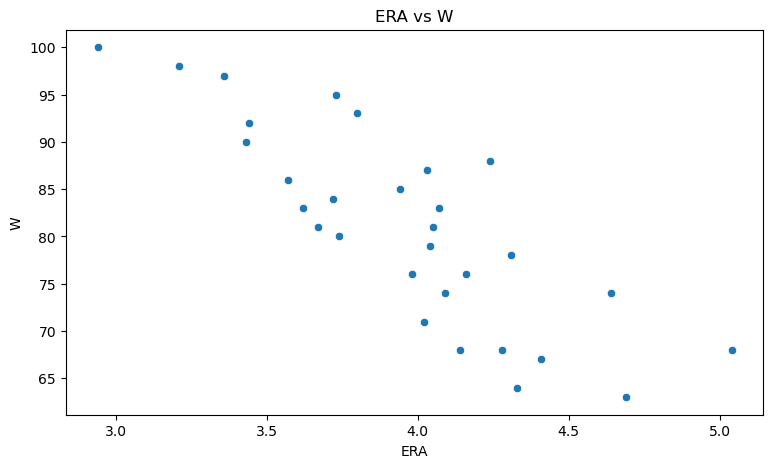

In [20]:
plt.figure(figsize=(9,5))

sns.scatterplot(x=data['ERA'],y=data['W'])

plt.title("ERA vs W")

plt.xlabel('ERA')

plt.ylabel("W")

plt.show()

ERA has negative relation with W

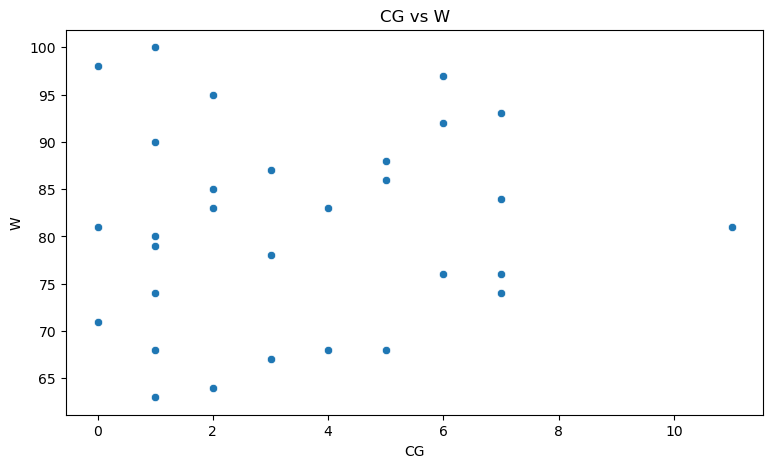

In [21]:
plt.figure(figsize=(9,5))

sns.scatterplot(x=data['CG'],y=data['W'])

plt.title("CG vs W")

plt.xlabel('CG')

plt.ylabel("W")

plt.show()

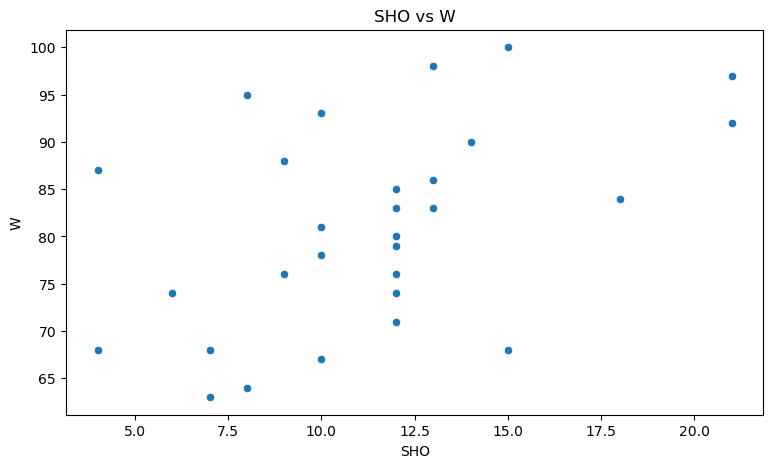

In [22]:
plt.figure(figsize=(9,5))

sns.scatterplot(x=data['SHO'],y=data['W'])

plt.title("SHO vs W")

plt.xlabel('SHO')

plt.ylabel("W")

plt.show()

SHO has positive realtion with W

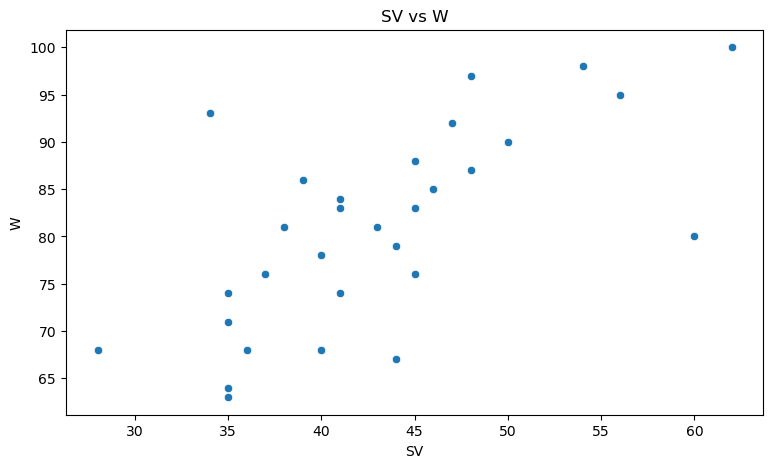

In [23]:
plt.figure(figsize=(9,5))

sns.scatterplot(x=data['SV'],y=data['W'])

plt.title("SV vs W")

plt.xlabel('SV')

plt.ylabel("W")

plt.show()

SV has positive realtion with W

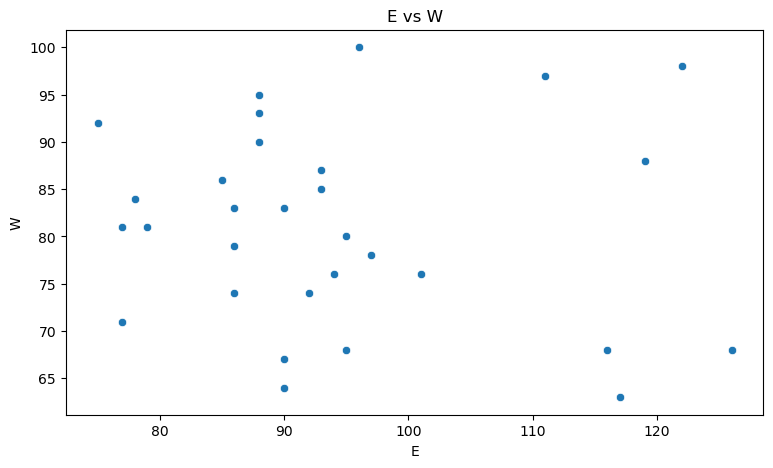

In [24]:
plt.figure(figsize=(9,5))

sns.scatterplot(x=data['E'],y=data['W'])

plt.title("E vs W")

plt.xlabel('E')

plt.ylabel("W")

plt.show()

In [25]:
features = data.drop('W',axis=1)

label = data['W']

 Checking distribution of data for each feature

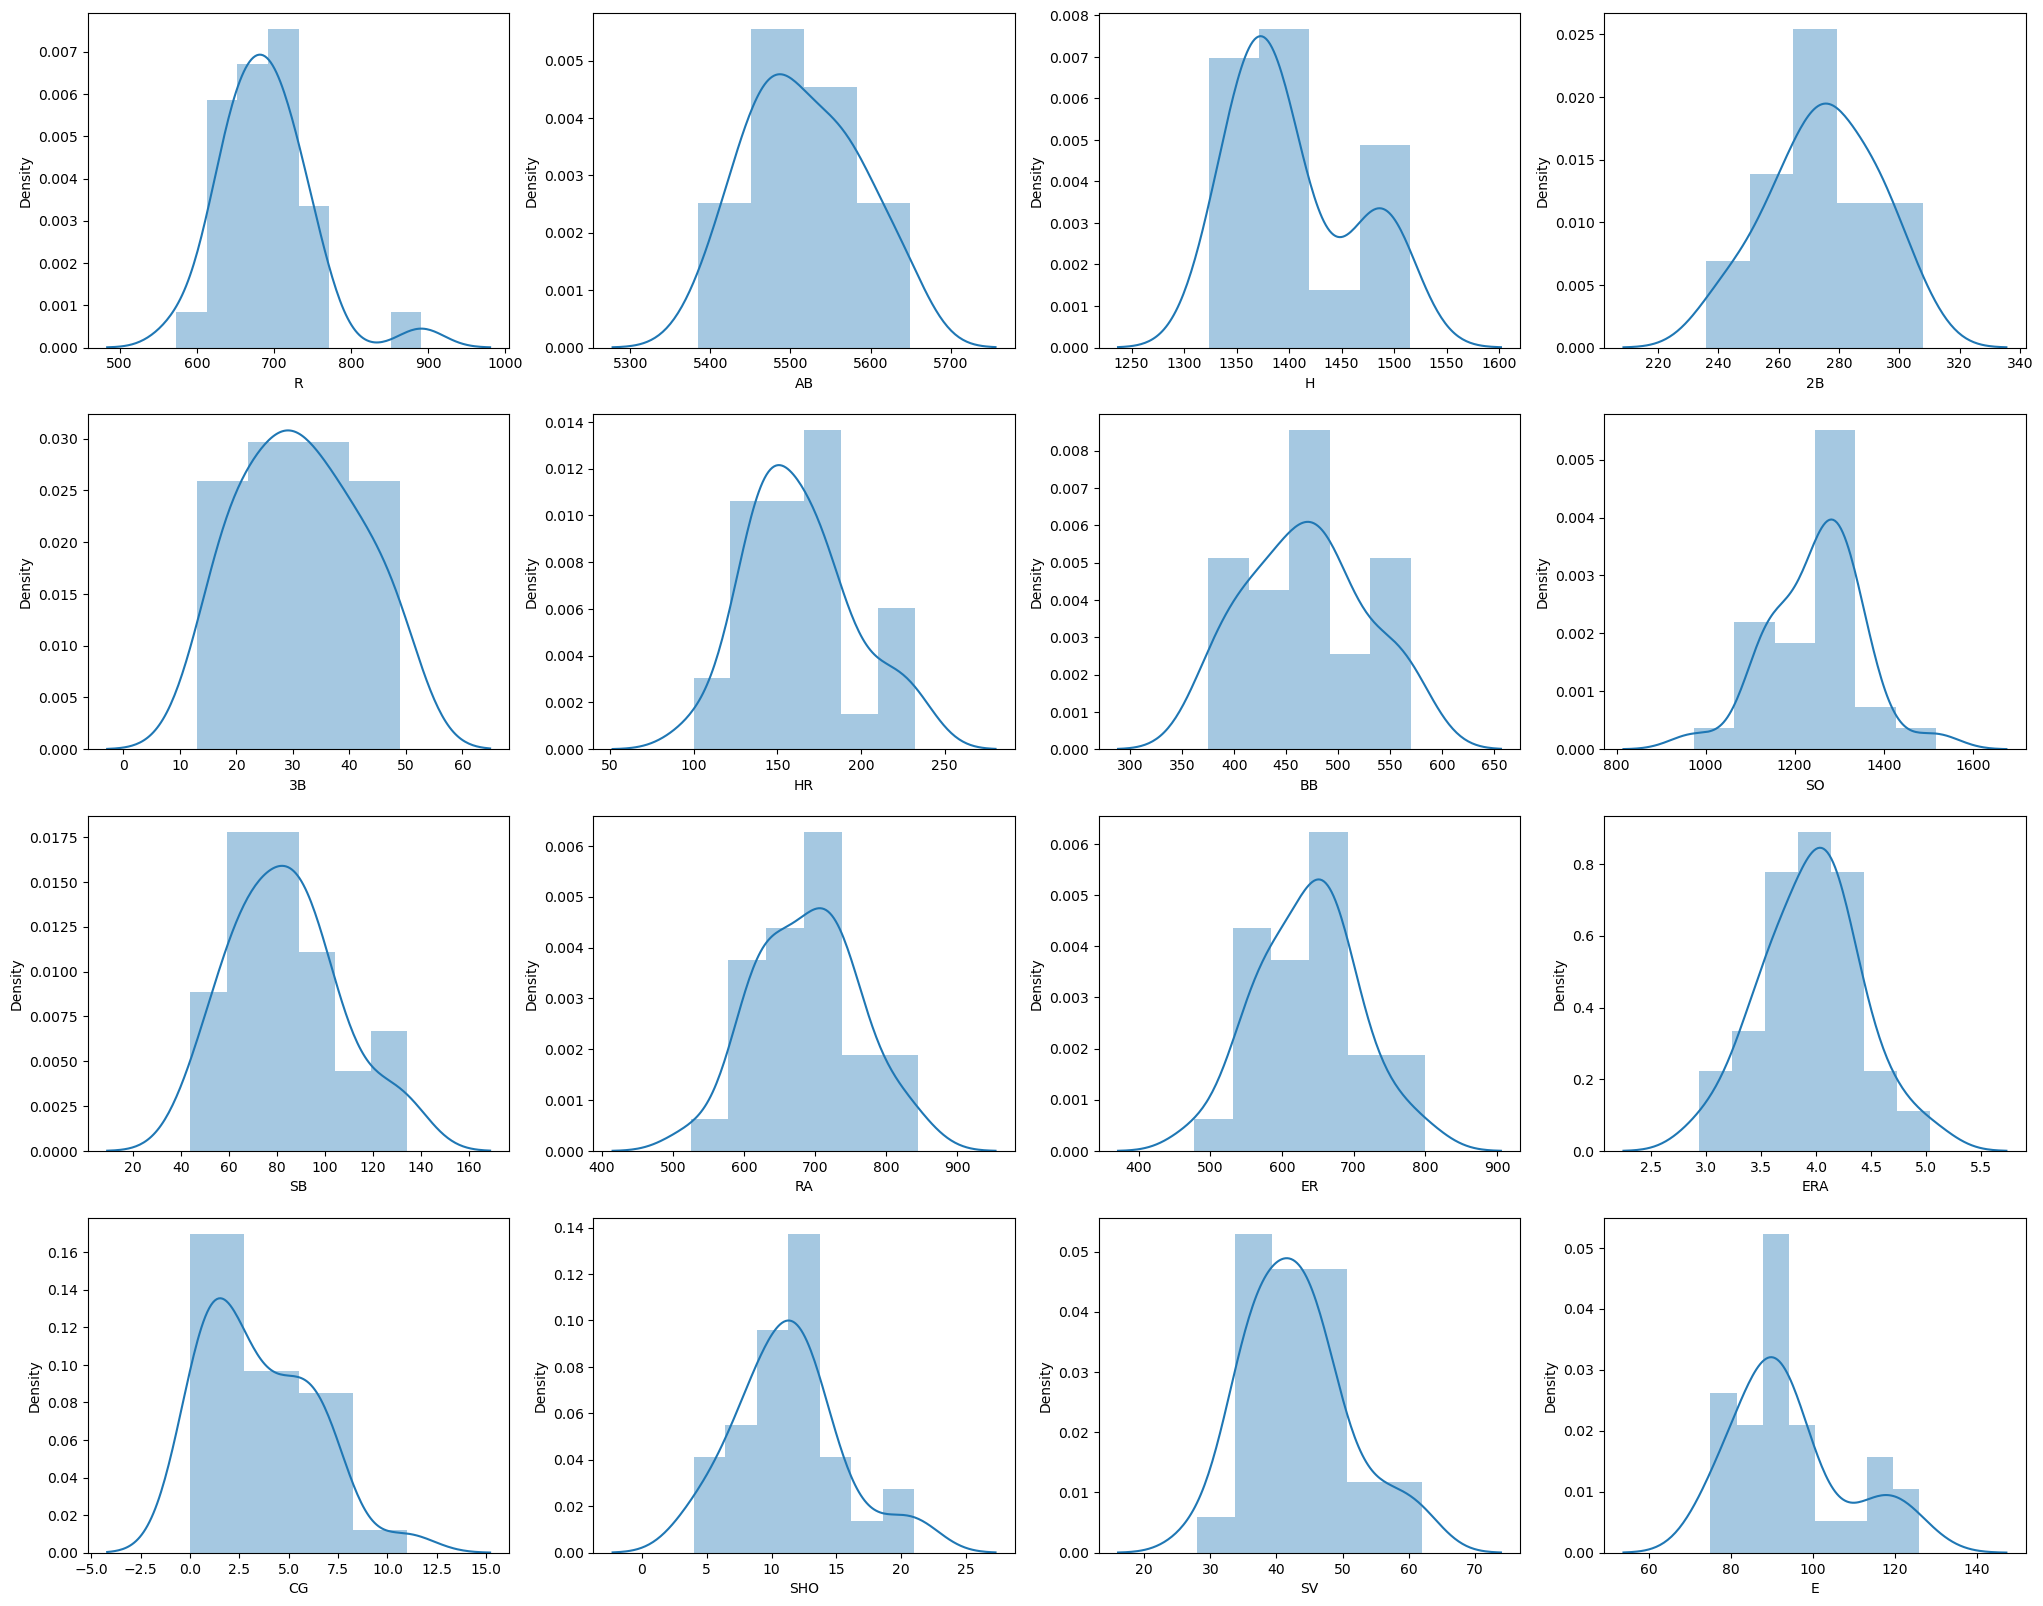

In [26]:
plt.figure(figsize=(25,20))

plotnumber = 1

for i in features:
    if plotnumber <=16:
        plt.subplot(4,4,plotnumber)
        sns.distplot(features[i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()

almost all of the features are normally distributed but not perfectly


Checking for Outliers

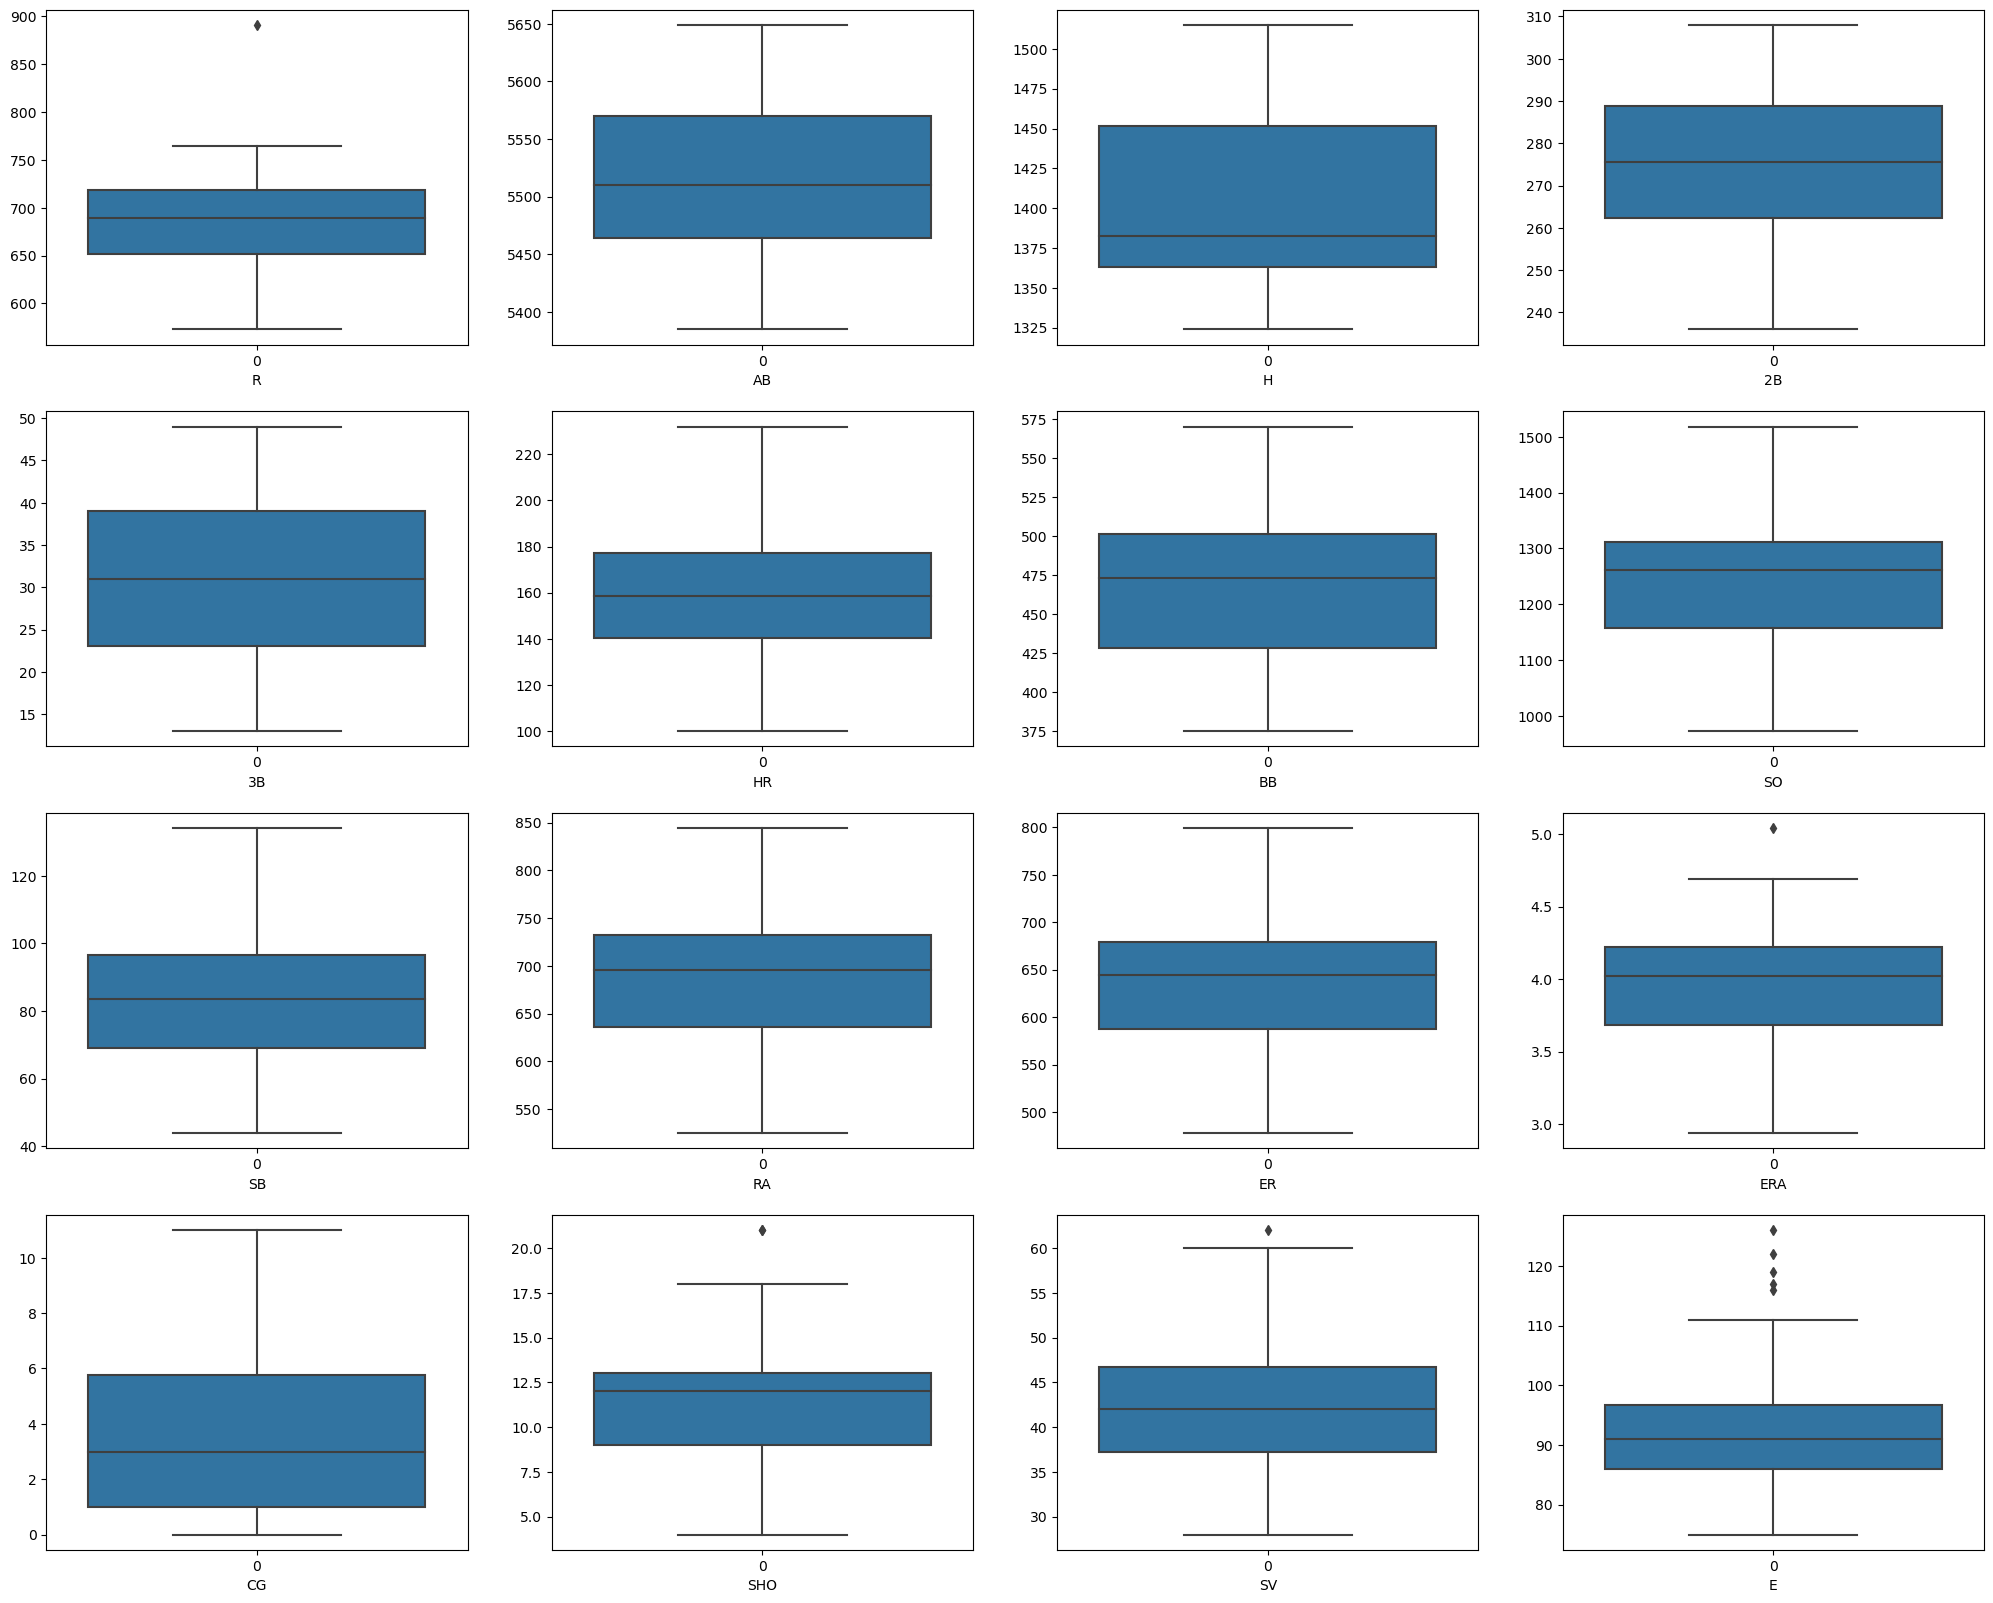

In [27]:
plt.figure(figsize=(25,20))

plotnumber = 1

for i in features:
    if plotnumber <=16:
        plt.subplot(4,4,plotnumber)
        sns.boxplot(features[i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()

R,ERA,SV,E have outliers present

In [28]:
data.corr()['W'].sort_values()

ERA   -0.819600
RA    -0.812952
ER    -0.809435
3B    -0.251118
SB    -0.157234
E     -0.089485
AB    -0.087947
H      0.037612
CG     0.080533
SO     0.111850
HR     0.307407
2B     0.427797
R      0.430751
SHO    0.471805
BB     0.484342
SV     0.666530
W      1.000000
Name: W, dtype: float64

# FEATURE SELECTION

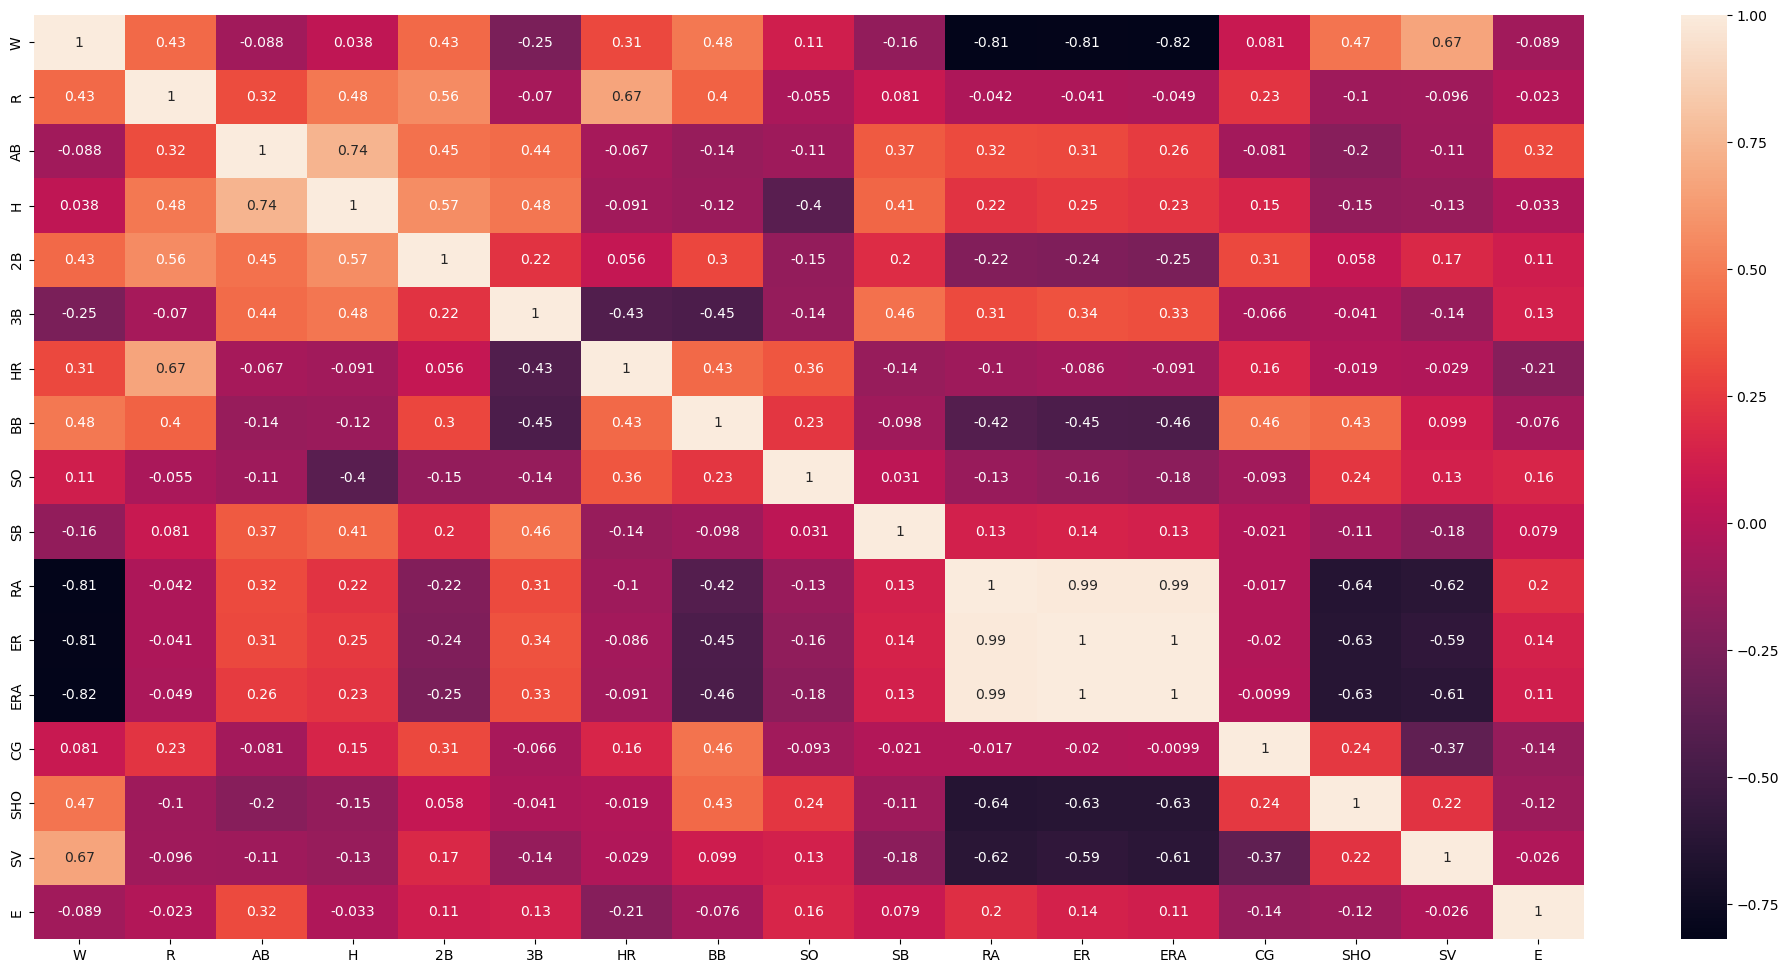

In [29]:
plt.figure(figsize=(25,12))

sns.heatmap(data.corr(),annot=True)

plt.show()

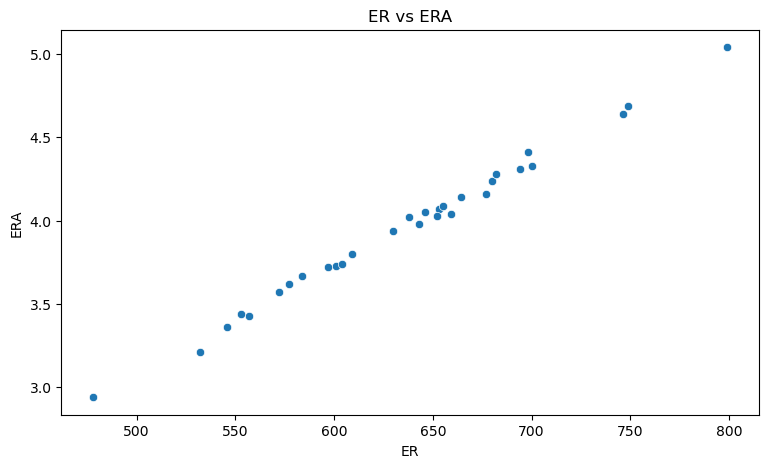

In [30]:
plt.figure(figsize=(9,5))

sns.scatterplot(x=data['ER'],y=data['ERA'])

plt.title("ER vs ERA")

plt.xlabel('ER')

plt.ylabel("ERA")

plt.show()

ER and ERA appear to have postitive linear relation ship with each other and highly co-related

ERA has highest realtion with the label so we drop ER

In [31]:
data.drop('ER',axis=1,inplace=True)

In [32]:
data.skew().sort_values()

2B    -0.230650
SO    -0.156065
RA     0.045734
W      0.047089
ERA    0.053331
3B     0.129502
BB     0.158498
AB     0.183437
SB     0.479893
HR     0.516441
SHO    0.565790
SV     0.657524
H      0.670254
CG     0.736845
E      0.890132
R      1.200786
dtype: float64

skewnewss below +/- 0.5 is tolerable

dealing with the outlers using zscore

In [33]:
features = data.drop('W',axis=1)

label = data['W']

dealing with the outliers

In [34]:
z = zscore(features)

In [35]:
data = data[(z<3).all(axis=1)]

In [36]:
data.shape

(29, 16)

In [37]:
data_loss = (30-29)/30

In [38]:
data_loss

0.03333333333333333

data loss below 10% is acceptable

In [39]:
X = data.drop('W',axis=1)

y = data['W']

In [40]:
mf = mutual_info_regression(X,y)

In [41]:
mf = pd.Series(mf)

mf.index = X.columns

mf.sort_values(ascending=False)

RA     0.499992
ERA    0.477160
SV     0.403399
BB     0.081413
SHO    0.070923
SO     0.049251
R      0.043828
HR     0.006680
AB     0.000000
H      0.000000
2B     0.000000
3B     0.000000
SB     0.000000
CG     0.000000
E      0.000000
dtype: float64

Selecting top 80% features

In [42]:
tten = SelectPercentile(mutual_info_regression,percentile=50)

tten.fit(X,y)

X.columns[tten.get_support()]

Index(['R', 'BB', 'SO', 'RA', 'ERA', 'SHO', 'SV'], dtype='object')

In [43]:
a = X.columns[tten.get_support()]

In [44]:
x = X[a]

# FEATURE SCALING

In [45]:
sc = StandardScaler()

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=8)

In [47]:
x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)

# Linear Regression

In [48]:
lr = LinearRegression()

In [49]:
lr.fit(x_train,y_train)

LinearRegression()

In [50]:
pred1 = lr.predict(x_train)

In [51]:
pred2 = lr.predict(x_test)

In [52]:
print(f'training Score: {r2_score(y_train,pred1)}')

training Score: 0.9347557336672604


In [53]:
print(f'test Score: {r2_score(y_test,pred2)}')

test Score: 0.7419533060452446


In [54]:
a1 = r2_score(y_train,pred1)

In [55]:
a2 = r2_score(y_test,pred2)

In [56]:
cv = cross_val_score(lr,x,y)

a3 = cv.mean()

a3

0.4225308361566073

# Lasso

In [57]:
ls = Lasso()

In [58]:
ls.fit(x_train,y_train)

Lasso()

In [59]:
pred3 = ls.predict(x_train)

In [60]:
pred4 = ls.predict(x_test)

In [61]:
print(f'training Score: {r2_score(y_train,pred3)}')

training Score: 0.9071831233549672


In [62]:
print(f'test Score: {r2_score(y_test,pred4)}')

test Score: 0.7767605433540364


In [63]:
a4 = r2_score(y_train,pred3)

In [64]:
a5 = r2_score(y_test,pred4)

In [65]:
cv = cross_val_score(ls,x,y)

a6 = cv.mean()

a6

0.34876243840151944

# RIDGE

In [66]:
ri = Ridge()

In [67]:
ri.fit(x_train,y_train)

Ridge()

In [68]:
pred5 = ri.predict(x_train)

In [69]:
pred6 = ri.predict(x_test)

In [70]:
print(f'training Score: {r2_score(y_train,pred5)}')

training Score: 0.9339457846488299


In [71]:
print(f'test Score: {r2_score(y_test,pred6)}')

test Score: 0.7597711555112064


In [72]:
a7 = r2_score(y_train,pred5)

In [73]:
a8 = r2_score(y_test,pred6)

In [74]:
cv = cross_val_score(ri,x,y)

a9 = cv.mean()

a9

0.337266607706467

# KNN

In [75]:
knn = KNeighborsRegressor()

In [76]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [77]:
pred7 = knn.predict(x_train)

In [78]:
pred8 = knn.predict(x_test)

In [79]:
print(f'training Score: {r2_score(y_train,pred7)}')

training Score: 0.7613622674933568


In [80]:
print(f'test Score: {r2_score(y_test,pred8)}')

test Score: 0.7416477965511232


In [81]:
a10 = r2_score(y_train,pred7)

In [82]:
a11 = r2_score(y_test,pred8)

In [83]:
cv = cross_val_score(knn,x,y)

a12 = cv.mean()

a12

-0.21033795681100353

# DECISION TREE

In [84]:
dt = DecisionTreeRegressor()

In [85]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [86]:
pred9 = dt.predict(x_train)

In [87]:
pred10 = dt.predict(x_test)

In [88]:
print(f'training Score: {r2_score(y_train,pred9)}')

training Score: 1.0


In [89]:
print(f'test Score: {r2_score(y_test,pred10)}')

test Score: 0.6958717993380944


In [90]:
a13 = r2_score(y_train,pred9)

In [91]:
a14 = r2_score(y_test,pred10)

In [92]:
cv = cross_val_score(dt,x,y)

a15 = cv.mean()

a15

-1.0767709425145122

# RANDOM FOREST

In [93]:
rf = RandomForestRegressor()

In [94]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [95]:
pred11 = rf.predict(x_train)

In [96]:
pred12 = rf.predict(x_test)

In [97]:
print(f'training Score: {r2_score(y_train,pred11)}')

training Score: 0.9448263308237379


In [98]:
print(f'test Score: {r2_score(y_test,pred12)}')

test Score: 0.6535988155373627


In [99]:
a16 = r2_score(y_train,pred11)

In [100]:
a17 = r2_score(y_test,pred12)

In [101]:
cv = cross_val_score(rf,x,y)

a18 = cv.mean()

a18

-0.6432912703342842

# ADA

In [102]:
ada = AdaBoostRegressor()

In [103]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [104]:
pred13 = ada.predict(x_train)

In [105]:
pred14 = ada.predict(x_test)

In [106]:
print(f'training Score: {r2_score(y_train,pred13)}')

training Score: 0.9877287716377434


In [107]:
print(f'test Score: {r2_score(y_test,pred14)}')

test Score: 0.819505715541747


In [108]:
a19 = r2_score(y_train,pred13)

In [109]:
a20 = r2_score(y_test,pred14)

In [110]:
cv = cross_val_score(ada,x,y)

a21 = cv.mean()

a21

-0.5947274512647238

# GBDT

In [111]:
gb = GradientBoostingRegressor()

In [112]:
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [113]:
pred15 = gb.predict(x_train)

In [114]:
pred16 = gb.predict(x_test)

In [115]:
print(f'training Score: {r2_score(y_train,pred15)}')

training Score: 0.9999992712890169


In [116]:
print(f'test Score: {r2_score(y_test,pred16)}')

test Score: 0.7338128638807959


In [117]:
a22 = r2_score(y_train,pred15)

In [118]:
a23 = r2_score(y_test,pred16)

In [119]:
cv = cross_val_score(gb,x,y)

a24 = cv.mean()

a24

-0.8955130083343036

# XGBOOST

In [120]:
xg = XGBRegressor()

In [121]:
xg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [122]:
pred17 = xg.predict(x_train)

In [123]:
pred18 = xg.predict(x_test)

In [124]:
print(f'training Score: {r2_score(y_train,pred17)}')

training Score: 0.9999999950848296


In [125]:
print(f'test Score: {r2_score(y_test,pred18)}')

test Score: 0.7180495643045127


In [126]:
a25 = r2_score(y_train,pred17)

In [127]:
a26 = r2_score(y_test,pred18)

In [128]:
cv = cross_val_score(xg,x,y)

a27 = cv.mean()

a27

-0.9297112694769236

# SVM

In [129]:
svm = SVR()

In [130]:
svm.fit(x_train,y_train)

SVR()

In [131]:
pred19 = svm.predict(x_train)

In [132]:
pred20 = svm.predict(x_test)

In [133]:
print(f'training Score: {r2_score(y_train,pred19)}')

training Score: 0.329765539226743


In [134]:
print(f'test Score: {r2_score(y_test,pred20)}')

test Score: 0.08592968991874217


In [135]:
a28 = r2_score(y_train,pred19)

In [136]:
a29 = r2_score(y_test,pred20)

In [137]:
cv = cross_val_score(svm,x,y)

a30 = cv.mean()

a30

-0.4111993645440739

# RESULT

In [138]:
train = []
test = []

In [139]:
model = ['LR','LASSO','RIDGE','KNN','DT','RF','ADA','GBDT','XGBOOST','SVM']

In [140]:
train.append(a1)
test.append(a2)

train.append(a4)
test.append(a5)

train.append(a7)
test.append(a8)

train.append(a10)
test.append(a11)

train.append(a13)
test.append(a14)

train.append(a16)
test.append(a17)

train.append(a19)
test.append(a20)

train.append(a22)
test.append(a23)

train.append(a25)
test.append(a26)

train.append(a28)
test.append(a29)

In [141]:
result = pd.DataFrame({'MODEL NAME':model,"TRAINING SCORE":train,"TEST SCORE":test})

In [142]:
result

,MODEL NAME,TRAINING SCORE,TEST SCORE
0,LR,0.934756,0.741953
1,LASSO,0.907183,0.776761
2,RIDGE,0.933946,0.759771
3,KNN,0.761362,0.741648
4,DT,1.000000,0.695872
5,RF,0.944826,0.653599
6,ADA,0.987729,0.819506
7,GBDT,0.999999,0.733813
8,XGBOOST,1.000000,0.718050
9,SVM,0.329766,0.085930


KNN model according to results above, it explains 76% of variance in train dataset and predicts upto 74% in test data

In [143]:
result.to_csv('baseball_50.csv')

In [144]:
result2 = pd.read_csv('baseball_60.csv')

In [145]:
result2.drop('Unnamed: 0',axis=1,inplace=True)

In [146]:
result2

,MODEL NAME,TRAINING SCORE,TEST SCORE
0,LR,0.941203,0.780031
1,LASSO,0.907183,0.776761
2,RIDGE,0.937555,0.760859
3,KNN,0.644631,0.680989
4,DT,1.000000,0.779481
5,RF,0.936242,0.648192
6,ADA,0.982608,0.734370
7,GBDT,0.999999,0.760144
8,XGBOOST,1.000000,0.761165
9,SVM,0.300399,0.048545


when tried by selecting top 60% featured model was getting overfit

In [147]:
result3 = pd.read_csv('baseball_70.csv')

In [148]:
result3.drop('Unnamed: 0',axis=1,inplace=True)

In [149]:
result3

,MODEL NAME,TRAINING SCORE,TEST SCORE
0,LR,0.942073,0.767623
1,LASSO,0.907183,0.776761
2,RIDGE,0.938982,0.763447
3,KNN,0.670972,0.688013
4,DT,1.000000,0.760669
5,RF,0.940884,0.655439
6,ADA,0.982691,0.673186
7,GBDT,1.000000,0.719075
8,XGBOOST,1.000000,0.694861
9,SVM,0.305824,0.047899


when tried by selecting top 70% featured model was getting overfit

In [150]:
result4 = pd.read_csv('baseball_80.csv')

In [151]:
result4.drop('Unnamed: 0',axis=1,inplace=True)

In [152]:
result4

,MODEL NAME,TRAINING SCORE,TEST SCORE
0,LR,0.943321,0.771183
1,LASSO,0.907183,0.776761
2,RIDGE,0.939967,0.754461
3,KNN,0.616762,0.684041
4,DT,1.000000,0.734541
5,RF,0.926938,0.572244
6,ADA,0.984226,0.700233
7,GBDT,1.000000,0.712866
8,XGBOOST,1.000000,0.775468
9,SVM,0.297977,0.048815


when tried by selecting top 80% featured model was getting overfit

In [153]:
result5 = pd.read_csv('baseball_90.csv')

In [154]:
result5.drop('Unnamed: 0',axis=1,inplace=True)

In [155]:
result5

,MODEL NAME,TRAINING SCORE,TEST SCORE
0,LR,0.941429,0.806521
1,LASSO,0.860987,0.767475
2,RIDGE,0.934001,0.793205
3,KNN,-0.107640,-0.165039
4,DT,1.000000,-0.568210
5,RF,0.905062,-0.244313
6,ADA,0.984075,0.674731
7,GBDT,1.000000,0.624313
8,XGBOOST,1.000000,0.700714
9,SVM,-19.751661,-91.053412


when tried by selecting top 90% featured model was getting overfit

# HYPERPARAMTER TUNING

In [156]:
knn = KNeighborsRegressor()

In [157]:
para = {'n_neighbors':[3,4,5,6,7],
       'weights':['uniform', 'distance'],
       'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
       'leaf_size':range(20,35,1)}

In [158]:
gs = GridSearchCV(knn,para,n_jobs=-1)

In [159]:
gs.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': range(20, 35),
                         'n_neighbors': [3, 4, 5, 6, 7],
                         'weights': ['uniform', 'distance']})

In [160]:
gs.best_params_

{'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 3, 'weights': 'uniform'}

In [161]:
gs.best_estimator_.fit(x_train,y_train)

KNeighborsRegressor(leaf_size=20, n_neighbors=3)

In [162]:
trainpred = gs.best_estimator_.predict(x_train)

In [163]:
testpred = gs.best_estimator_.predict(x_test)

In [164]:
print(f'training Score: {r2_score(y_train,trainpred)}')

training Score: 0.7807745300659386


In [165]:
print(f'training Score: {r2_score(y_test,testpred)}')

training Score: 0.7031875979794461


In [166]:
mean_absolute_error(y_test,testpred)

6.222222222222221

In [167]:
mean_squared_error(y_test,testpred)

47.333333333333336

In [168]:
conclusion = pd.DataFrame({"Actual":y_test,'Predicted':testpred})

In [169]:
conclusion

,Actual,Predicted
25,92,90.000000
0,95,88.666667
8,80,91.000000
19,64,72.666667
15,100,95.000000
4,74,69.666667


In [170]:
pickle.dump(gs.best_estimator_,open('baseball.pkl','wb'))